In [61]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [62]:
data = pd.read_csv("../Apoyo_desafio/Fish.csv")
data = data.dropna()
data.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [63]:
#funcion solo para mostrar la corrlecion de los datos numericos 
def data_numerica(df):
    return df.select_dtypes(include=[np.number])
    
    


           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000

En esta correlacion podemos observar que sin aun calcular el volumen del pez algunas columnas no tienen tanta correlacion


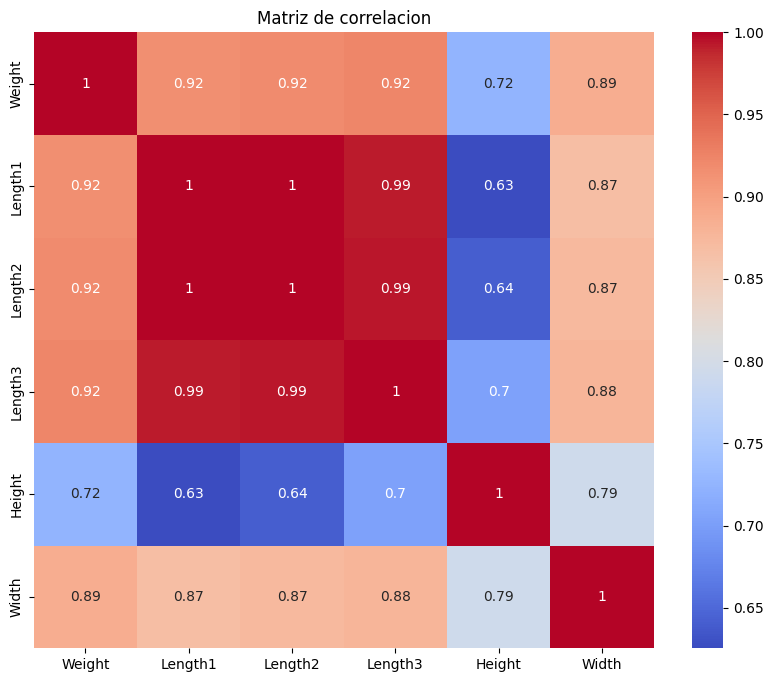

al verlo en el mapa del calor podemos ver que la correlacion entre Weight y height no es tan alta al igual que con width


In [64]:
#vamos a ver la correlacion sin incluir el volumen 
data1 = data_numerica(data)
correlacion =data1[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].corr()
print(correlacion)

print("\nEn esta correlacion podemos observar que sin aun calcular el volumen del pez algunas columnas no tienen tanta correlacion")
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion,annot=True,cmap='coolwarm')
plt.title("Matriz de correlacion")
plt.show()

print("al verlo en el mapa del calor podemos ver que la correlacion entre Weight y height no es tan alta al igual que con width")




In [65]:
#despues agregaremos el Volumen en un cilindro 
data['Volumen'] = np.pi*data['Height']*(data['Width']/2)**2


data

,Species,Weight,Length1,Length2,Length3,Height,Width,Volumen
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,146.215854
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,181.707071
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,214.391723
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,198.477454
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,257.609344
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,3.188567
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,3.073402
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,2.820291
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,9.641848


           Weight   Length1   Length2   Length3    Height     Width   Volumen
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507  0.881981
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050  0.732409
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547  0.741313
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520  0.767774
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881  0.868256
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000  0.905626
Volumen  0.881981  0.732409  0.741313  0.767774  0.868256  0.905626  1.000000


Un valor de 1 se puede deducir como una correlacion perfecta 
Un valor de 0 se puede deducir a una correlacion nula 
Y una correlacion -1 que en esta caso no tenemos se podria deducir que es una correlacion perfecta negativa 


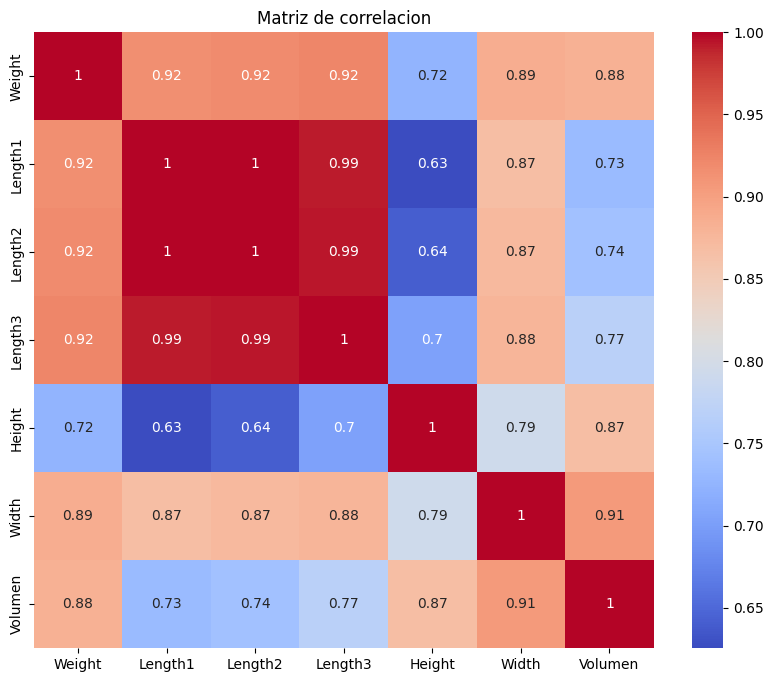

La correlación entre el peso y las longitudes, altura, y ancho no aumenta al añadir el volumen.
Las correlaciones con el peso se mantienen alrededor de:
- Longitudes (Length1, Length2, Length3): 0.92
- Altura (Height): 0.72
- Ancho (Width): 0.89

Sin embargo, al añadir el volumen, la correlación entre el peso y el volumen es 0.88,
lo que indica que el volumen es un buen predictor adicional del peso.


In [66]:
data1 = data_numerica(data)
correlacion =data1.corr()
print(correlacion)

print("\n\nUn valor de 1 se puede deducir como una correlacion perfecta ")
print("Un valor de 0 se puede deducir a una correlacion nula ")
print("Y una correlacion -1 que en esta caso no tenemos se podria deducir que es una correlacion perfecta negativa ")

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion,annot=True,cmap='coolwarm')
plt.title("Matriz de correlacion")
plt.show()

# Explicació de los resultados
print("La correlación entre el peso y las longitudes, altura, y ancho no aumenta al añadir el volumen.")
print("Las correlaciones con el peso se mantienen alrededor de:")
print("- Longitudes (Length1, Length2, Length3): 0.92")
print("- Altura (Height): 0.72")
print("- Ancho (Width): 0.89")
print("\nSin embargo, al añadir el volumen, la correlación entre el peso y el volumen es 0.88,")
print("lo que indica que el volumen es un buen predictor adicional del peso.")




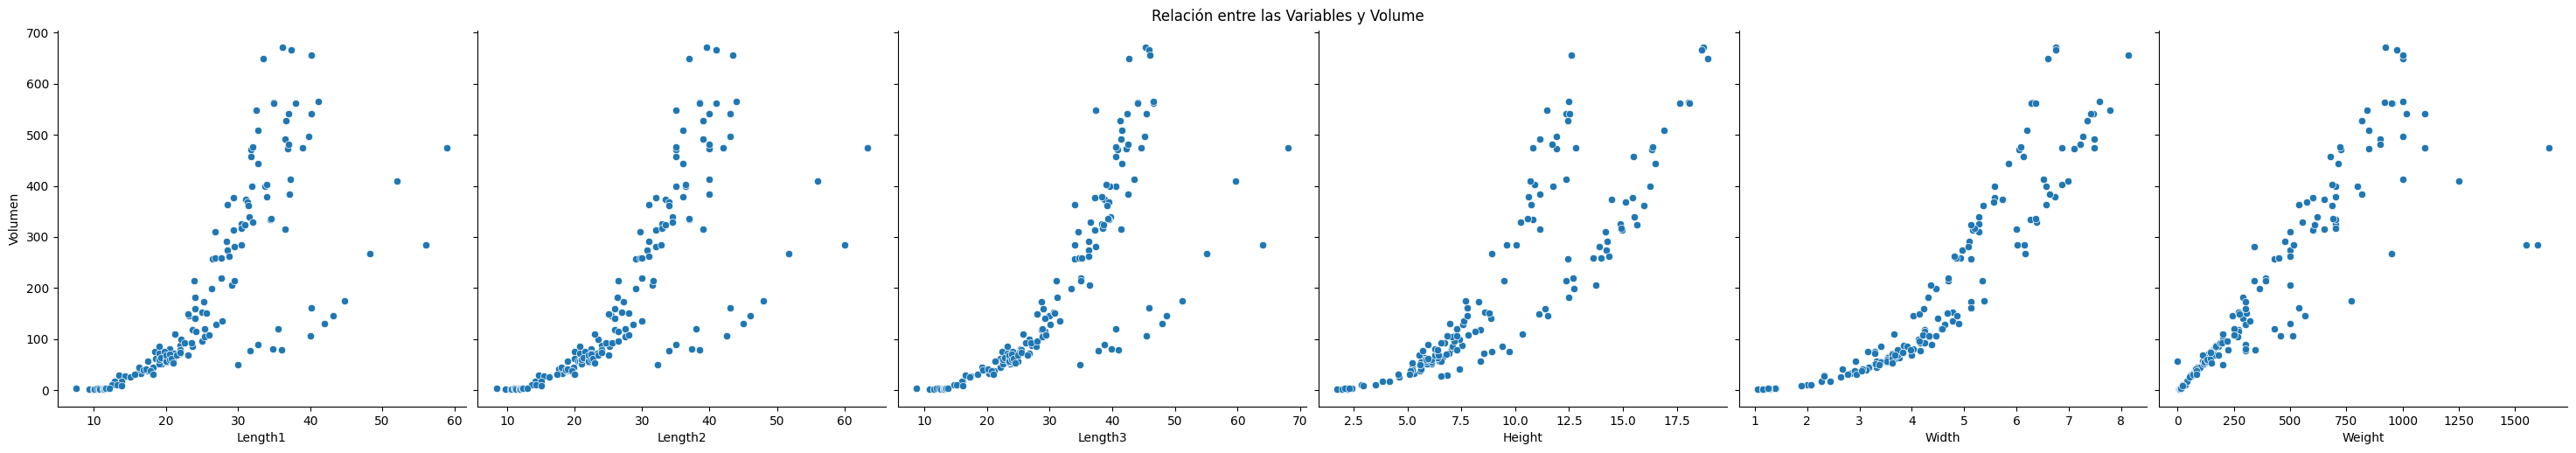

In [67]:
# b. Visualización gráfica mediante diagramas de dispersión para observar cómo se relacionan las variables.

#Importamos una libreria para evitar las advertencias que resultan al compactar los siguientes graficos
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Crear gráficos de dispersión para ver la relación entre las variables al agregar Volume
sns.pairplot(data, x_vars=['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight'], y_vars='Volumen', height=5)
plt.suptitle('Relación entre las Variables y Volume', y=1.02)
plt.show()


Conclusiones:
Longitudes (Length1, Length2, Length3):

En los gráficos se observa una relación no lineal entre el volumen y las longitudes. A medida que aumenta la longitud, el volumen también aumenta, pero de manera exponencial, como se puede ver por la curvatura ascendente de los puntos.
Esto indica que el volumen está correlacionado positivamente con las longitudes, lo cual tiene sentido porque a mayor longitud del pez, mayor será su volumen.
Altura (Height):

El gráfico entre la altura y el volumen también muestra una relación exponencial. Al igual que con las longitudes, el volumen tiende a aumentar con la altura, pero de forma no lineal.
Ancho (Width):

La relación entre el ancho y el volumen es bastante clara y muestra una tendencia creciente, con un patrón similar a las otras variables. Esto también es lógico, ya que el ancho es un componente directo del cálculo del volumen.
Peso (Weight):

La gráfica entre el peso y el volumen muestra una relación directa fuerte. Este gráfico es muy similar a lo que se esperaría de una regresión lineal, donde el volumen predice el peso de manera positiva. A mayor volumen, el peso del pez también aumenta, lo que valida que el volumen es una buena variable para predecir el peso.

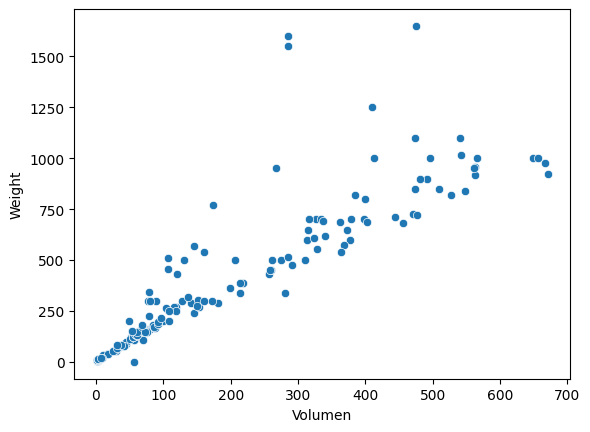

In [69]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # Para crear el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Para evaluar el modelo

# 1. Preparar los datos (Volumen como variable independiente y Peso como dependiente)
X = data[['Volumen']]  # Variable independiente (Volumen)
y = data['Weight']  # Variable dependiente (Peso)

#podemos ver la relacion de estos dos valores con una relacion 
sns.scatterplot(x='Volumen', y='Weight', data=data)
plt.show()

In [73]:
# Dividimos los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# 3. Evaluar el modelo con los datos de prueba
y_pred = modelo.predict(X_test)

# Mostramos el resultado de los pesos
y_pred


array([ 125.88940182,   61.37387739,  143.4269303 ,  264.3783536 ,
        150.54807171, 1195.16401151,   59.12212668,  205.00015766,
        217.03484176,  774.58379664,  710.4198097 ,  780.93389339,
        718.50338649,  188.87602276,  755.19281745, 1044.65339911,
       1207.60813234,  225.64020158,  195.30690259,  628.1538923 ,
         61.0095192 ,  623.86714584,  417.80654448,  538.26223653,
       1042.74474478, 1004.58147919,  175.98771529,  258.62038163,
         58.61053267,   60.12821418,  243.01375811,  110.69489978])

Coeficiente de determinación R²: 0.8863616511399243
Error Cuadrático Medio (MSE): 16163.837699070646


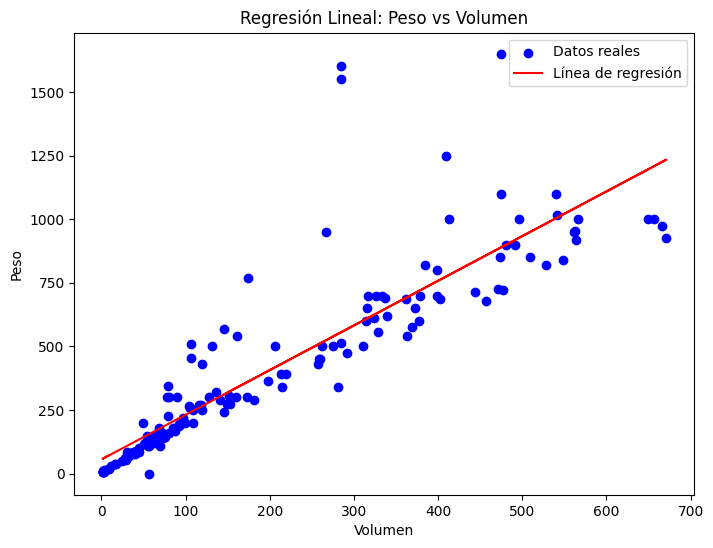

In [76]:
# Cálculo del coeficiente de determinación R²
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación R²: {r2}")

# Cálculo del Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")


# 4. Graficar los resultados
plt.figure(figsize=(8,6))

# Graficar los datos reales
plt.scatter(X, y, color='blue', label='Datos reales')

# Graficar la línea de regresión
plt.plot(X, modelo.predict(X), color='red', label='Línea de regresión')

plt.title('Regresión Lineal: Peso vs Volumen')
plt.xlabel('Volumen')
plt.ylabel('Peso')
plt.legend()
plt.show()

Conclusión:

El Error Cuadrático Medio (MSE) de 16,163.84 indica que, en promedio, el modelo tiene un error de esta magnitud (en gramos) al predecir el peso de los peces. Dado que los pesos de los peces en el dataset pueden variar considerablemente, este error es moderado; sin embargo, todavía deja margen para mejorar la precisión.

Por otro lado, el Coeficiente de Determinación (R²) es 0.886, lo que significa que el 88.6% de la variabilidad en el peso de los peces puede ser explicada únicamente por el volumen. Esto muestra que el volumen es un buen predictor del peso, aunque no el único factor que influye en el mismo. Es probable que otras características, como las longitudes o la especie del pez, también jueguen un papel importante en la predicción del peso.

En resumen, este modelo de regresión lineal entre el volumen y el peso funciona bastante bien para predecir el peso de los peces, pero no es completamente preciso. Para mejorar el modelo, sería recomendable incluir otras variables relevantes, como las longitudes o la especie, lo que podría reducir el error y mejorar el rendimiento general.

In [79]:
# Obtenemos las especies únicas en el DataFrame
especies = data['Species'].unique()

# Diccionario para guardar los resultados de cada especie
resultados_por_especie = {}

# Bucle para aplicar el modelo a cada especie
for especie in especies:
    # Filtramos el DataFrame para obtener solo los datos de la especie actual
    df_especie = data[data['Species'] == especie]
    
    # Seleccionamos las variables de interés (Volumen y Peso)
    X_especie = df_especie[['Volumen']]  # Volumen como variable independiente
    y_especie = df_especie['Weight']  # Peso como variable dependiente
    
    # Dividimos los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_especie, y_especie, test_size=0.2, random_state=42)
    
    # Creamos el modelo de regresión lineal
    modelo = LinearRegression()
    
    # Entrenamos el modelo con los datos de entrenamiento
    modelo.fit(X_train, y_train)
    
    # Predecimos el peso de los peces en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Evaluamos el modelo: Error Cuadrático Medio (MSE) y Coeficiente de Determinación (R²)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardamos los resultados en el diccionario
    resultados_por_especie[especie] = {'MSE': mse, 'R²': r2}

    # Mostramos los resultados de la especie actual
    print(f"Resultados para {especie}:")
    print(f"  Error Cuadrático Medio (MSE): {mse}")
    print(f"  Coeficiente de Determinación (R²): {r2}\n")


Resultados para Bream:
  Error Cuadrático Medio (MSE): 5269.549726142476
  Coeficiente de Determinación (R²): 0.8373032125131651

Resultados para Roach:
  Error Cuadrático Medio (MSE): 221.52669340937206
  Coeficiente de Determinación (R²): 0.9782607833850582

Resultados para Whitefish:
  Error Cuadrático Medio (MSE): 5541.423289489796
  Coeficiente de Determinación (R²): 0.0

Resultados para Parkki:
  Error Cuadrático Medio (MSE): 57.283683021840396
  Coeficiente de Determinación (R²): 0.9928828357050642

Resultados para Perch:
  Error Cuadrático Medio (MSE): 4747.5748953155135
  Coeficiente de Determinación (R²): 0.9592421047814468

Resultados para Pike:
  Error Cuadrático Medio (MSE): 62308.96407975727
  Coeficiente de Determinación (R²): 0.7952919769662445

Resultados para Smelt:
  Error Cuadrático Medio (MSE): 2.978220305737381
  Coeficiente de Determinación (R²): 0.5569589627828688



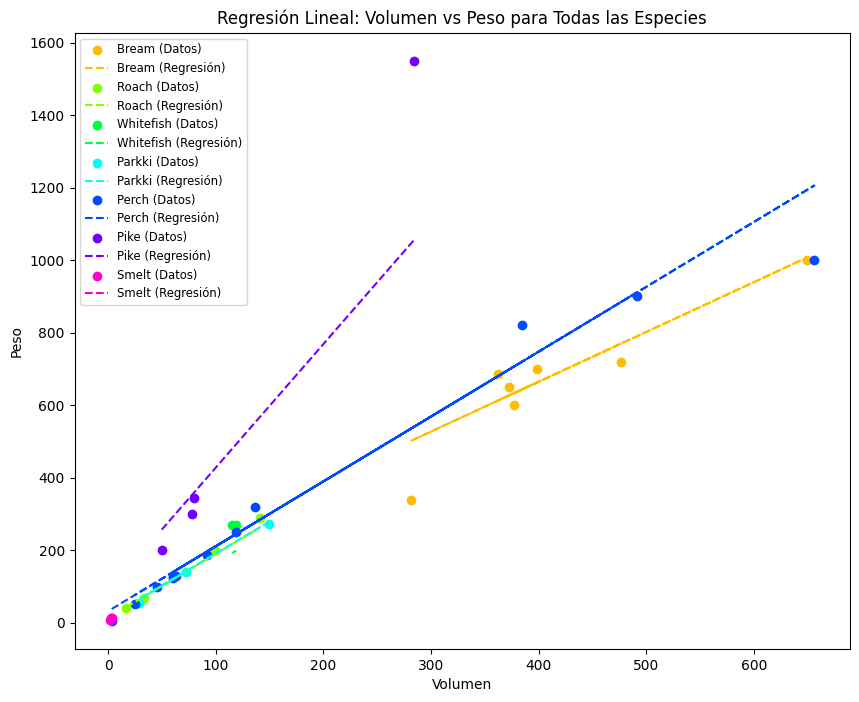

In [81]:
# Creamos una paleta de colores para las diferentes especies
palette = sns.color_palette("hsv", len(especies))

# Creamos un gráfico de dispersión con diferentes colores para cada especie
plt.figure(figsize=(10, 8))

# Bucle para aplicar el modelo a cada especie y añadir al gráfico
for idx, especie in enumerate(especies):
    # Filtramos el DataFrame para obtener solo los datos de la especie actual
    df_especie = data[data['Species'] == especie]
    
    # Seleccionamos las variables de interés (Volumen y Peso)
    X_especie = df_especie[['Volumen']]  # Volumen como variable independiente
    y_especie = df_especie['Weight']  # Peso como variable dependiente
    
    # Dividimos los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_especie, y_especie, test_size=0.2, random_state=42)
    
    # Creamos el modelo de regresión lineal
    modelo = LinearRegression()
    
    # Entrenamos el modelo con los datos de entrenamiento
    modelo.fit(X_train, y_train)
    
    # Predecimos el peso de los peces en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Añadimos los datos de prueba al gráfico de dispersión
    plt.scatter(X_test, y_test, color=palette[idx], label=f'{especie} (Datos)')
    
    # Dibujamos la línea de regresión para la especie actual
    plt.plot(X_test, y_pred, color=palette[idx], linestyle='--', label=f'{especie} (Regresión)')
    
# Añadimos etiquetas y título al gráfico
plt.xlabel('Volumen')
plt.ylabel('Peso')
plt.title('Regresión Lineal: Volumen vs Peso para Todas las Especies')
plt.legend(loc='best', fontsize='small')  # Añadimos una leyenda para identificar las especies
plt.show()


Conclusión:

A partir de los resultados y los gráficos, es evidente que cada especie de pez tiene características diferentes, y el modelo de regresión lineal no funciona igual de bien para todas. Por ejemplo, en especies como los Roach y los Parkki, el modelo es muy preciso, ya que el volumen predice el peso casi perfectamente. Sin embargo, para especies como los Whitefish, el volumen no es un buen predictor del peso.

Esto nos muestra que, aunque en general el volumen es una buena variable para predecir el peso de los peces, no es igualmente efectivo para todas las especies. Algunas especies pueden tener otras características que afectan más su peso, lo que sugiere que el peso en estos casos depende de más factores que solo el volumen. Para mejorar la precisión en estas especies, sería necesario incluir otras variables como la longitud o la especie en el modelo.

Mean Squared Error: 5329.844448856095
R-squared: 0.9625290271948307


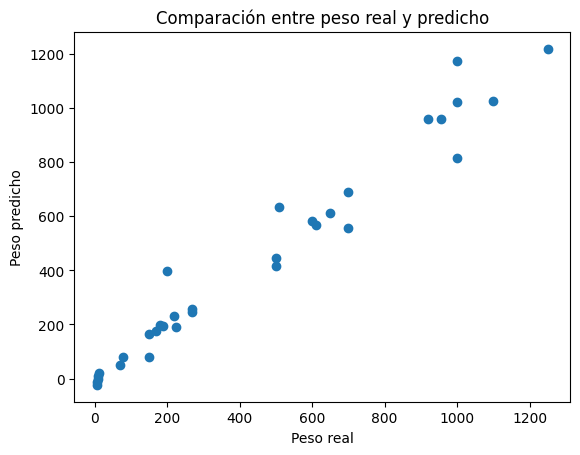

In [83]:
#Importamos las librerias necesarias
from sklearn.preprocessing import StandardScaler

# Seleccionamos todas las variables
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volumen']]
y = data['Weight']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualizar las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Peso real")
plt.ylabel("Peso predicho")
plt.title("Comparación entre peso real y predicho")
plt.show()

Conclusión:

El modelo de regresión lineal múltiple que hemos construido es bastante bueno. El coeficiente de determinación (R²) de 0.96 nos indica que el modelo puede explicar el 96.25% de la variabilidad en el peso de los peces, lo que sugiere una alta precisión en las predicciones.

Sin embargo, el Error Cuadrático Medio (MSE) de 5329.84 indica que aún existe un margen de error significativo en nuestras predicciones. Esto podría significar que, aunque el modelo general es sólido, todavía hay espacio para mejorar, especialmente en los pesos más altos o extremos, como se observa en el gráfico.

Resultados para Bream:
  Error Cuadrático Medio (MSE): 6541.667740834795
  Coeficiente de Determinación (R²): 0.7980267040730255

Resultados para Parkki:
  Error Cuadrático Medio (MSE): 147.99655570828904
  Coeficiente de Determinación (R²): 0.9816122891110384

Resultados para Perch:
  Error Cuadrático Medio (MSE): 3900.3465689166846
  Coeficiente de Determinación (R²): 0.9665155536716635

Resultados para Pike:
  Error Cuadrático Medio (MSE): 1355.1503175431958
  Coeficiente de Determinación (R²): 0.9955478293289752

Resultados para Roach:
  Error Cuadrático Medio (MSE): 2050.4608854594617
  Coeficiente de Determinación (R²): 0.7987808481973995

Resultados para Smelt:
  Error Cuadrático Medio (MSE): 2.750975461673173
  Coeficiente de Determinación (R²): 0.5907639809081229

Resultados para Whitefish:
  Error Cuadrático Medio (MSE): 16982.59119820544
  Coeficiente de Determinación (R²): 0.0



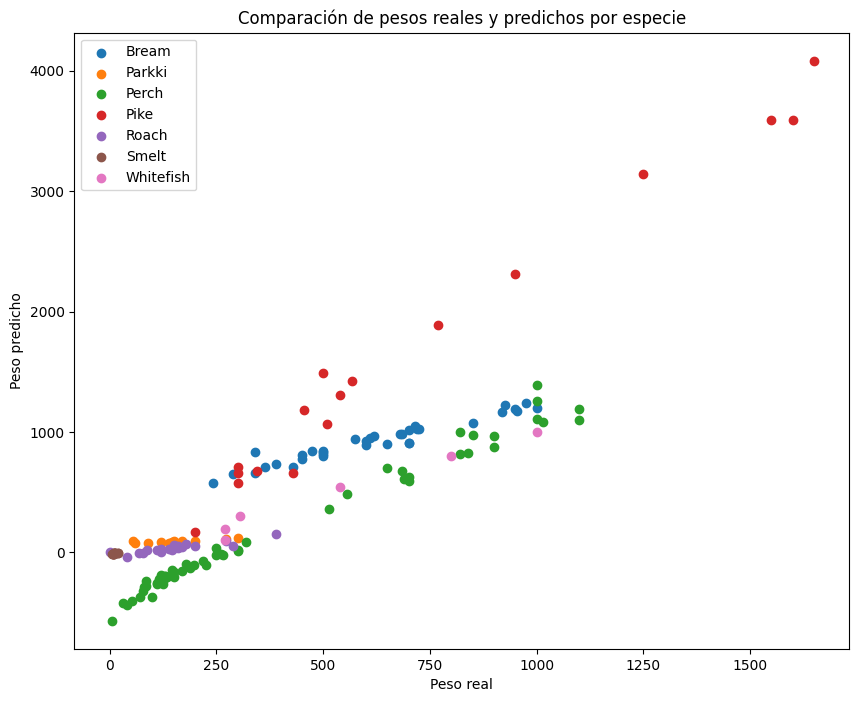

In [86]:
# Agrupar los datos por especie
grouped = data.groupby('Species')

# Diccionario para almacenar los modelos y métricas
models_and_metrics = {}

# Iterar sobre cada grupo (especie)
for name, group in grouped:
    # Separar características y variable objetivo
    X = group[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volumen']]
    y = group['Weight']
    
    # Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) 

    
    # Almacenar modelo y métricas
    models_and_metrics[name] = {'model': model, 'mse': mse, 'r2': r2}
    
    # Mostrar los resultados de la especie actual
    print(f"Resultados para {name}:")
    print(f"  Error Cuadrático Medio (MSE): {mse}")
    print(f"  Coeficiente de Determinación (R²): {r2}\n")

# Crear un gráfico para todas las especies
plt.figure(figsize=(10, 8))

for name, metrics in models_and_metrics.items():
    # Obtener los datos de prueba para esta especie
    group = grouped.get_group(name)
    X_test = group[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volumen']]
    y_test = group['Weight']
    X_test_scaled = scaler.transform(X_test)
    
    # Hacer predicciones
    y_pred = metrics['model'].predict(X_test_scaled)
    
    # Graficar
    plt.scatter(y_test, y_pred, label=name)

plt.xlabel('Peso real')
plt.ylabel('Peso predicho')
plt.title('Comparación de pesos reales y predichos por especie')
plt.legend()
plt.show()

Conclusión:

El rendimiento del modelo de regresión lineal varía significativamente según la especie de pez:

Mejor rendimiento:

Parkki y Pike: El modelo predice el peso de estos peces con mucha precisión, como lo demuestra el bajo Error Cuadrático Medio (MSE) y el alto R². Esto sugiere que las variables que estamos utilizando (longitudes, altura, ancho, y volumen) son altamente predictivas para estas especies.
Rendimiento razonable:

Bream y Roach: El modelo tiene un rendimiento razonablemente bueno, con un R² alrededor de 0.79, lo que significa que el modelo puede predecir el peso, pero aún hay margen de mejora. El MSE es más alto que en Parkki y Pike, lo que indica que el modelo no ajusta tan bien para estas especies.
Peor rendimiento:

Smelt: El modelo tiene un rendimiento muy pobre para los Smelt con un R² de 0.59 y un MSE muy bajo. Esto sugiere que el volumen y las otras variables no son buenas predictores del peso de los Smelt. Sería recomendable investigar otras características o probar con otro tipo de modelo.
Rendimiento más bajo:

Whitefish: Para los Whitefish, el modelo falla completamente. Con un R² de 0.0, el modelo no es capaz de predecir el peso de manera útil para esta especie. Es evidente que las características utilizadas no son suficientes para hacer predicciones precisas para los Whitefish.